In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append('/home/fabian/project_one/update/')
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
import datetime
import util
import numpy as np
from singleStockScan import ScanModel
from updater import StockUpdater

In [8]:
ob  = StockUpdater(FileNameListOfCompanies='DAX.csv',PathData='/home/fabian/project_one/data/')
#ob.update_chart_markers()
#ob.update_stock_classification()
#shorts = pd.read_pickle('/home/fabian/project_one/data/shorts/list.p')

#short = shorts[['Date','EVT.DE']]
#print short

In [13]:
_input = pd.read_pickle('/home/fabian/project_one/data/chart/stocks/ALV.DE.p')

_classification = pd.read_pickle('/home/fabian/project_one/data/classification/stocks/ALV.DE.p')
common_dates =util.find_common_notnull_dates(_input,_classification)

_input  = _input.loc[_input['Date'].isin(common_dates)]

#c2 = util.find_common_notnull_dates(_input,short)

#_input = _input.loc[_input['Date'].isin(c2)]
_input.reset_index(drop=True,inplace=True)
#short = short.loc[short['Date'].isin(c2)]
#short.reset_index(drop=True,inplace=True)

#print short.tail(5)
#_input['short'] = pd.Series(short['EVT.DE'],index=_input.index)

print _input.tail(2)
print _input.head(2)
Xfull  = _input.loc[:,_input.columns.isin(['Date','Close']) == False].values

_classification = _classification.loc[_classification['Date'].isin(common_dates)]
Yfull = np.argmax(_classification.loc[:,_classification.columns.isin(['Date']) == False].values,axis=1)


print Xfull.shape,Yfull.shape

           Date       Close     Volume      GD200     GD200X     GD100  \
4319 2018-01-12  202.000000  1231006.0  184.37160  184.05810  193.0897   
4320 2018-01-15  202.100006   923834.0  184.52435  184.21315  193.2977   

        GD100X        GD50    GD50X        GD38    ...        MACDH    MACDHX  \
4319  192.7242  198.110400  198.035  197.349211    ...     0.846290  0.628487   
4320  192.9092  198.087401  198.063  197.482106    ...     0.860215  0.741864   

      MAX20     MAX65    MAX130    MAX260     MIN20     MIN65    MIN130  \
4319    0.0 -0.009318 -0.009318 -0.009318  0.054830  0.054830  0.144476   
4320    0.0 -0.008828 -0.008828 -0.008828  0.055353  0.055353  0.145043   

        MIN260  
4319  0.301127  
4320  0.301771  

[2 rows x 40 columns]
        Date       Close    Volume       GD200      GD200X       GD100  \
0 2000-12-18  379.899994  524016.0  389.806451  389.683341  388.801502   
1 2000-12-19  381.049988  621441.0  389.951201  389.751701  388.572102   

       GD1

In [15]:
#scan = ScanModel(ModelType='RFC')
#print scan.StockGridModeling(['ALV.DE'],scaled=False)

In [18]:
RFC = RandomForestClassifier(n_estimators=100)

cv= ShuffleSplit(n_splits=10,test_size=0.1,random_state=12312)


param_grid = [{'max_depth':[10,15,20,50,70,100,150,200],'max_features':['auto','log2']}]
#param_grid = [{'max_depth':[10,100],'max_features':['auto']}]
print param_grid
grids = GridSearchCV(RFC,param_grid,cv=cv,n_jobs=-3)
grids.fit(Xfull,Yfull)


print grids.cv_results_['mean_test_score']

print grids.best_params_
print grids.best_score_

[{'max_features': ['auto', 'log2'], 'max_depth': [10, 15, 20, 50, 70, 100, 150, 200]}]
[0.5369515  0.53579677 0.60023095 0.60854503 0.61385681 0.61524249
 0.62471132 0.61939954 0.61639723 0.61939954 0.61755196 0.61986143
 0.61547344 0.62009238 0.62263279 0.62309469]
{'max_features': 'auto', 'max_depth': 50}
0.6247113163972287


In [17]:
x = pd.read_pickle('/home/fabian/project_one/data/predictions/predictions_scan.p')
print x.loc[x['Labels'] == 'ALV.DE']

     Labels ModelType                                 SearchedParameters  \
8    ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
132  ALV.DE       RFC  [{u'max_features': [u'auto', u'log2'], u'max_d...   
453  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [10.0], u'gamma':...   
455  ALV.DE       SVM  [{u'kernel': [u'rbf'], u'C': [0.1, 1, 5, 10.0,...   

                BestParameters BestParameterValues     Score   Input  \
8    [max_features, max_depth]         [log2, 200]  0.557843  Single   
132  [max_features, max_depth]          [log2, 20]  0.549020  Single   
453         [kernel, C, gamma]      [rbf, 10.0, 1]  0.575610  Single   
455         [kernel, C, gamma]      [rbf, 10.0, 1]  0.592195  Single   

                                        ListOfFeatures        Date  \
8    [Close, Volume, GD200, GD100, GD50, GD38, Lowe...  2018-01-29   
132  [Volume, GD200, GD100, GD50, GD38, Lower_BB_20...  2018-01-31   
453  [Volume, GD200, GD100, GD50, GD38, Lower_BB

In [106]:
Xtrain,Xval,Ytrain,Yval = train_test_split(Xfull[-1000:,:],Yfull[-1000:],test_size=0.1,random_state=10)

In [108]:
ob =RandomForestClassifier(n_estimators=150,oob_score=True,max_depth=150)

ob.fit(Xtrain,Ytrain)
print ob.oob_score_
print "trainings set:", ob.oob_score_, "predicition set:", ob.score(Xval,Yval)
print "\n"
print ob.feature_importances_



0.6377777777777778
trainings set: 0.6377777777777778 predicition set: 0.57


[0.0473772  0.06983596 0.0628173  0.04862748 0.04710216 0.05381395
 0.04933949 0.04386843 0.05430057 0.05883562 0.04058368 0.03888068
 0.04338671 0.04819497 0.04812818 0.06092246 0.05704322 0.07208508
 0.05485684]


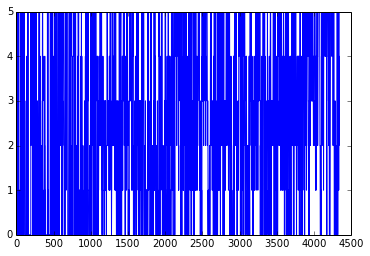

In [59]:
ob =RandomForestClassifier(n_estimators=300,oob_score=True,max_depth=20,max_features='log2')
ob.fit(Xtrain,Ytrain)


trainings set: 1.0 predicition set: 1.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
InputData = pd.read_csv('/localscratch/data/project_one/data/chart/Germany/DAX/ADS.DE_input.csv',index_col='Unnamed: 0')
OutputData= pd.read_csv('/localscratch/data/project_one/data/chart/Germany/DAX/ADS.DE_output.csv',index_col='Unnamed: 0')

In [9]:
import sys
sys.path.append('/localscratch/data/project_one/update/')
from singleStockScan import ScanModel
from sklearn.model_selection import ShuffleSplit
%load_ext autoreload
%autoreload 2

In [10]:
x = 'RFC'
print x.isin(['RFC'])

AttributeError: 'str' object has no attribute 'isin'

In [11]:
print ob.ParamGridRFC

Xfull = InputData.loc[:,InputData.columns.isin(['Date']) == False].values
Yfull = np.argmax(OutputData.loc[:,OutputData.columns.isin(['Date']) == False].values,axis=1)

# set random_state np.random.randint(1,1e6)
#Xtrain,Xval,Ytrain,Yval = train_test_split(Xfull,Yfull,self.test_size,random_state=1)
cv = ShuffleSplit(n_splits=10,test_size = 0.1,random_state=True)

out_ =  ob.gridSearchRFC(Xfull,Yfull,cv)


NameError: name 'ob' is not defined

In [148]:
print out_

(0.5436893203883495, {'max_features': 'auto', 'max_depth': 100})


In [151]:
cv = ShuffleSplit(n_splits=10,test_size = 0.1,random_state=True)


True

In [155]:
test = pd.DataFrame(columns=['Labels','ModelType','parameter','values','score','Input','ListOfFeature'])
s = ['DAI.DE','RFC','max_depth',out_[1]['max_depth'],out_[0]]

test = test.append({'Labels':'DAI.DE','ModelType':'RFC','parameter':out_[1].keys(),'values':out_[1].values(),'score':out_[0],'Input':'Single','ListOfFeature':'default'},ignore_index=True)

In [159]:
tmp= test.loc[(test['Labels'] == 'DAI.DE') &
               (test['ModelType'] == 'RFC') &
               (test['ModelType'] == 'RFC') ]
test.loc[tmp.index.tolist(),['parameter','values','score']] = [0.5,0.2,1.]
print test
#print test.loc[test[['Labels','ModelType']] ==['DAI.DE','RFC']]

   Labels ModelType  parameter  values  score   Input ListOfFeature
0  DAI.DE       RFC        0.5     0.2    1.0  Single       default


In [13]:
ob = ScanModel(ModelType='RFC',
               ListOfIndices={'Germany':['DAX']},
               PathData = '/localscratch/data/project_one/data/',n_jobs=-2)
ob.StockGridModeling()

Label:  HEI.DE prediction done
Label:  MUV2.DE prediction done
Label:  DB1.DE prediction done
Label:  TKA.DE prediction done
Label:  SIE.DE prediction done
Label:  VNA.DE prediction done
Label:  PSM.DE prediction done
Label:  DTE.DE prediction done
Label:  IFX.DE prediction done
Label:  RWE.DE prediction done
Label:  ADS.DE prediction done
Label:  BMW.DE prediction done
Label:  DPW.DE prediction done
Label:  BEI.DE prediction done
Label:  DAI.DE prediction done
Label:  LIN.DE prediction done
Label:  BAS.DE prediction done
Label:  EOAN.DE prediction done
Label:  SAP.DE prediction done
Label:  LHA.DE prediction done
Label:  ALV.DE prediction done
Label:  HEN3.DE prediction done
Label:  CBK.DE prediction done
Label:  FME.DE prediction done
Label:  CON.DE prediction done
Label:  FRE.DE prediction done
Label:  VOW3.DE prediction done
Label:  MRK.DE prediction done
Label:  BAYN.DE prediction done
Label:  DBK.DE prediction done
     Labels ModelType                     Parameters ParameterVal

In [108]:
print np.any(test.values != np.nan)

True
